In [2]:
# ! pip install -U matplotlib
# ! pip install -U numpy
# ! pip install -U scipy
# ! pip install ipympl
# ! pip install -q ipympl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from random import randint
%matplotlib widget
# from google.colab import output
# output.enable_custom_widget_manager()

In [4]:
def plot(*args):
    ax = plt.figure()
    for y in args:
        x = np.arange(y.size)
        plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

## Свёртка и деконволюция


### Свёртка


In [5]:
def convolve_element(
        f_array: np.ndarray,
        g_array: np.ndarray,
        k: int) -> np.ndarray:
    """ Свёртка элемента """

    def get_f(idx: int):
        """ 
        Получаем значение f
        Если индекс выходит за пределы массива, то возвращаем 0
        """
        if idx >= 0 and idx < f_array.size:
            return f_array[idx]
        return 0

    result = np.zeros(g_array.size)
    for idx in range(k - g_array.size, k):
        result[g_array.size - (k - idx)] = get_f(idx) * g_array[k - idx - 1]
    return np.sum(result)

In [6]:
def convolve(
    array_1: np.ndarray,
    array_2: np.ndarray
) -> np.ndarray:
    """ Cвёртка двух массивов """
    result = np.zeros(array_1.size + array_2.size)
    for idx in range(1, result.size):
        result[idx] = convolve_element(array_1, array_2, idx)
    return result

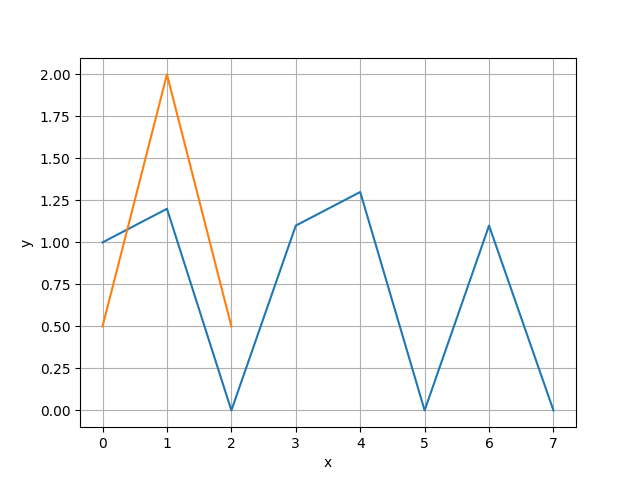

In [7]:
y_1 = np.array([1., 1.2, 0., 1.1, 1.3, 0, 1.1, 0])
x_1 = np.arange(stop=y_1.size)
y_2 = np.array([0.5, 2, 0.5])
x_2 = np.arange(stop=y_2.size)
plot(y_1, y_2)

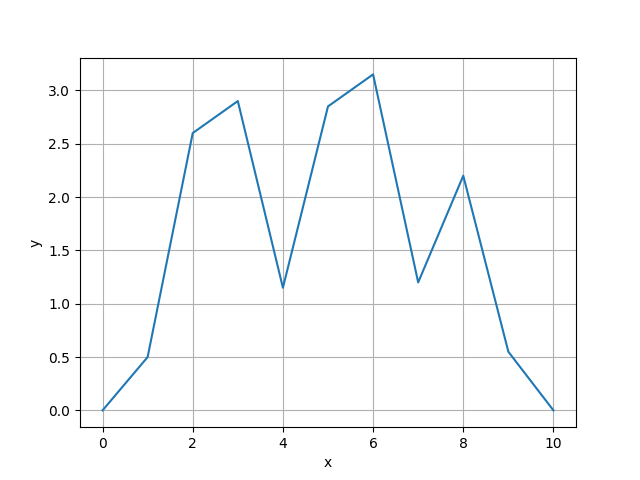

In [8]:
convolved = convolve(y_1, y_2)
expected = np.zeros(convolved.size)
expected[1:] = signal.convolve(y_1, y_2, mode='full')
np.testing.assert_array_equal(convolved, expected)
plot(convolved)

### Деконволюция в частотной области


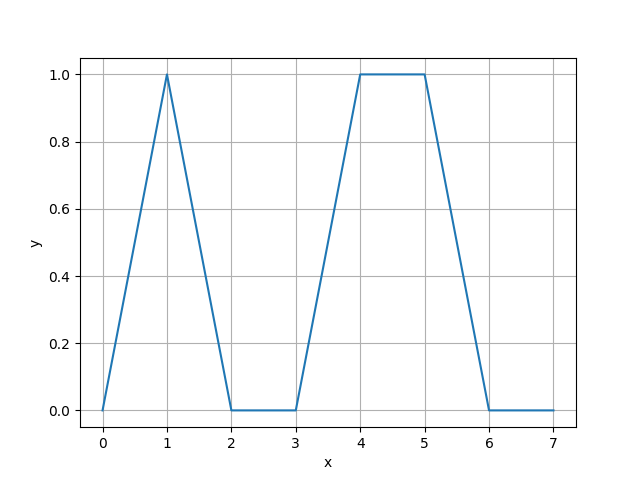

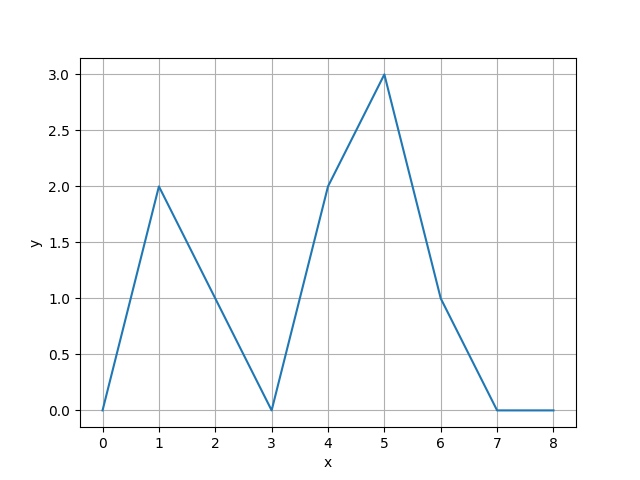

In [24]:
original = np.array([0, 1, 0, 0, 1, 1, 0, 0])
impulse_response = np.array([2, 1])
convolved = signal.convolve(impulse_response, original)
plot(original)
plot(convolved)

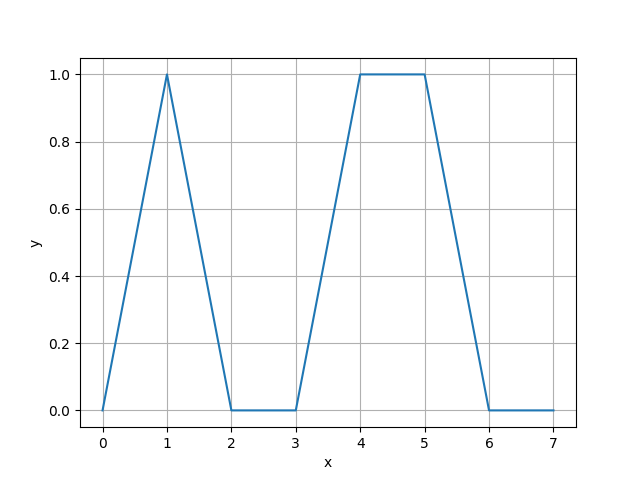

In [10]:
recovered, _ = signal.deconvolve(convolved, impulse_response)
plot(recovered)

### Свертка сигнала с функцией Гаусса


In [11]:
def form_signal(n: int) -> np.ndarray:
    tmp = [0]
    for _ in range(n):
        tmp.append(0.25 + randint(0, 100) / 50)
        for _ in range(10 - randint(0, 8)):
            tmp.append(0)
    return np.array(tmp)

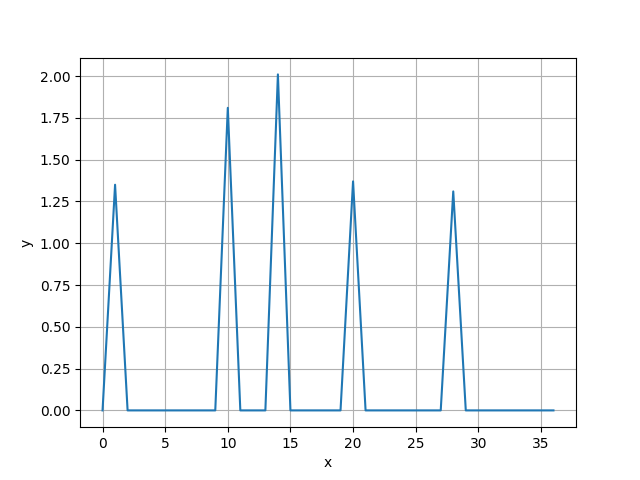

In [12]:
signal_s = form_signal(5)
plot(signal_s)

In [25]:
def y(x, w):

    def numerator():
        degree = (-1) * (x ** 2) / (2 * (w ** 2))
        return np.power(np.e, degree)

    def denominator():
        return np.sqrt(2 * np.pi) * w

    return numerator() / denominator()

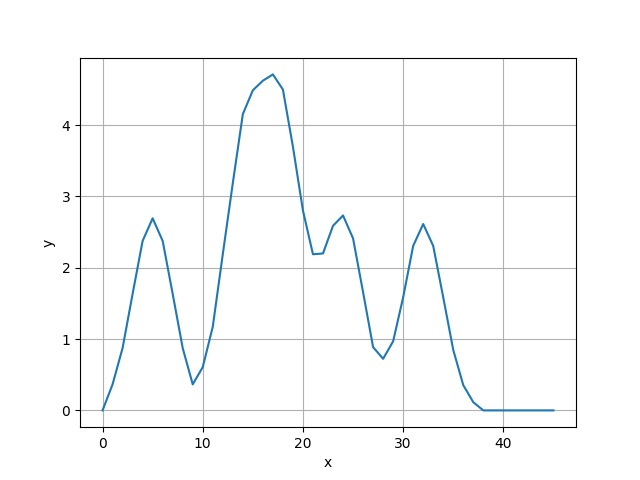

In [26]:
N = 10
DX = 1 / N
x = -0.5 + DX * np.arange(start=1, stop=N + 1)
IR = y(x, 1 / 5)
convolved_signal = signal.convolve(signal_s, IR, mode='full', method='direct')
plot(convolved_signal)

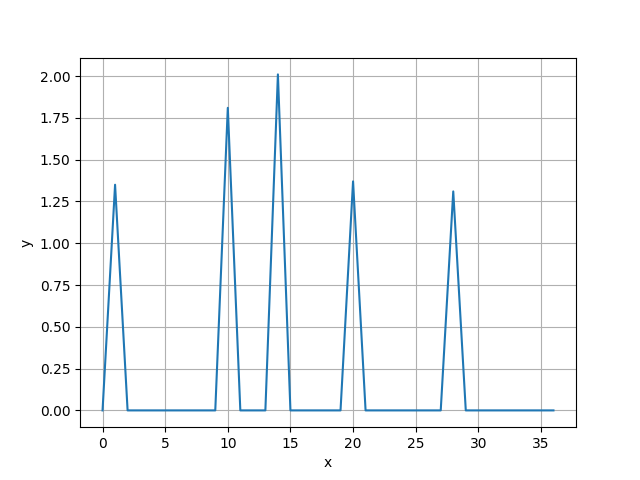

In [15]:
deconvolved_signal, _ = signal.deconvolve(convolved_signal, y(x, 1 / 5))
plot(np.array(deconvolved_signal))

### Деконволюция сигнала с использованием априорной информации о форме импульсной характеристики и последовательным ручным уточнением ее параметров


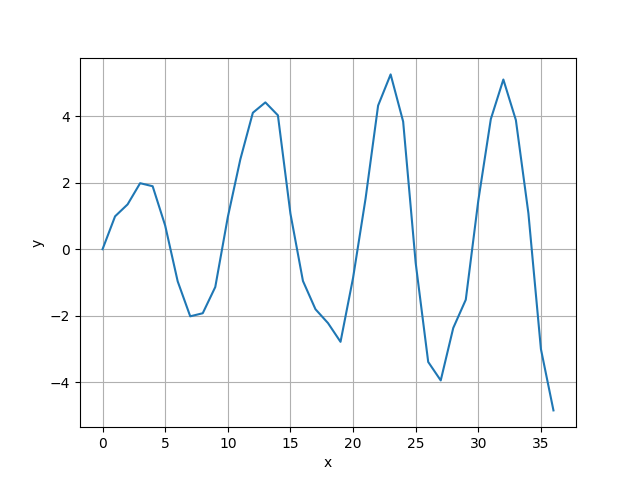

In [16]:
deconvolved_signal, _ = signal.deconvolve(convolved_signal, y(x, 1))
plot(np.array(deconvolved_signal))

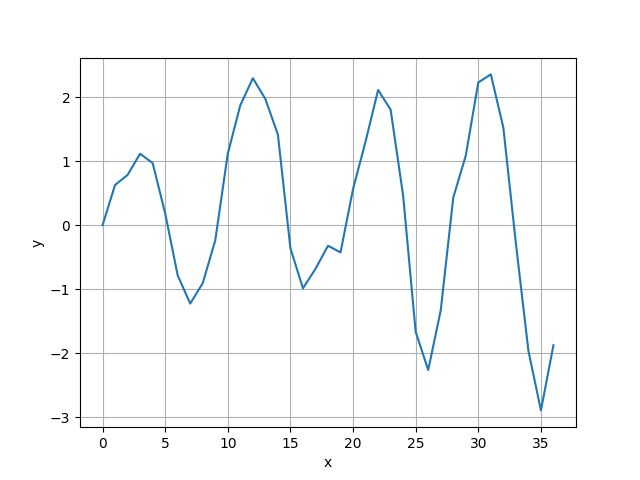

In [28]:
ir = y(x, 1 / 2)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(np.array(deconvolved_signal))

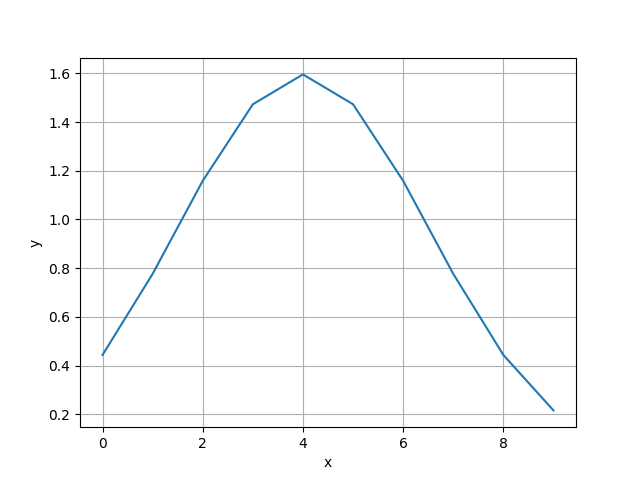

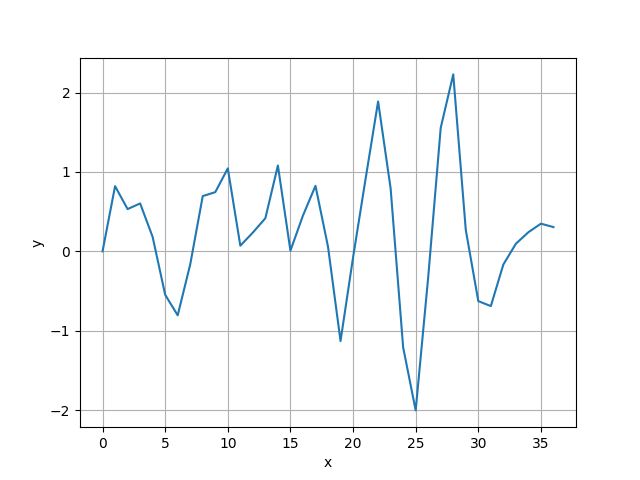

In [18]:
ir = y(x, 1 / 4)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(ir)
plot(np.array(deconvolved_signal))

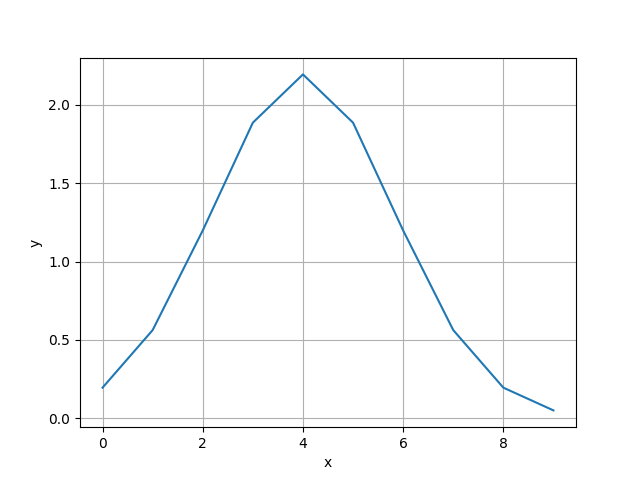

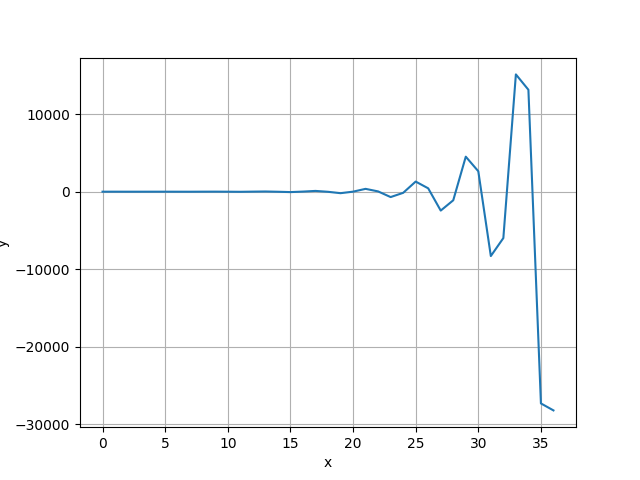

In [30]:
ir = y(x, 1 / 5.5)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(ir)
plot(np.array(deconvolved_signal))

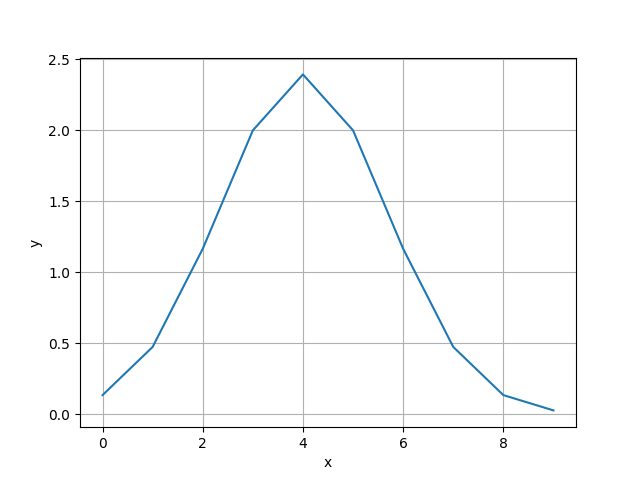

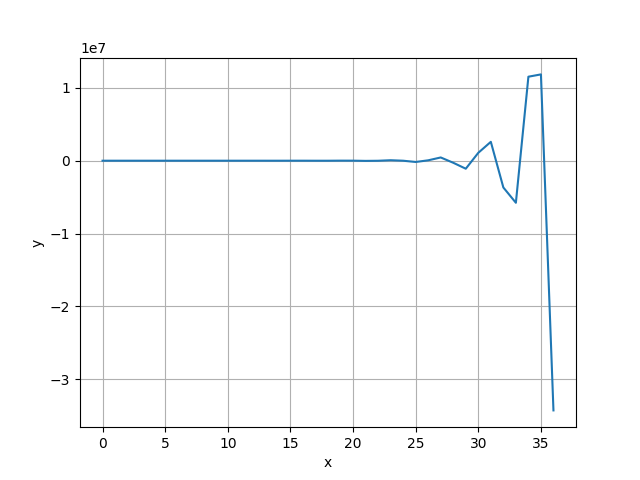

In [19]:
ir = y(x, 1 / 6)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(np.array(deconvolved_signal))

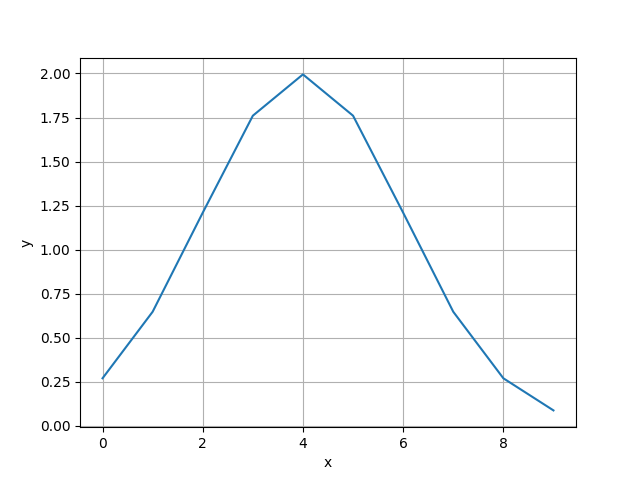

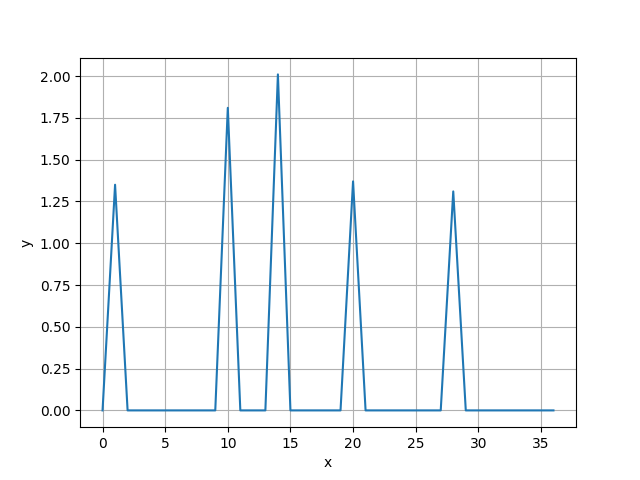

In [20]:
ir = y(x, 1 / 5)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(np.array(deconvolved_signal))

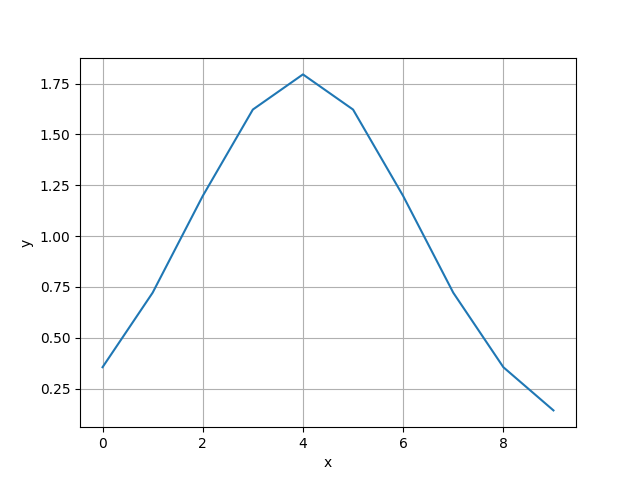

C:\Users\playe\AppData\Local\Temp\ipykernel_9128\2564143282.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure()


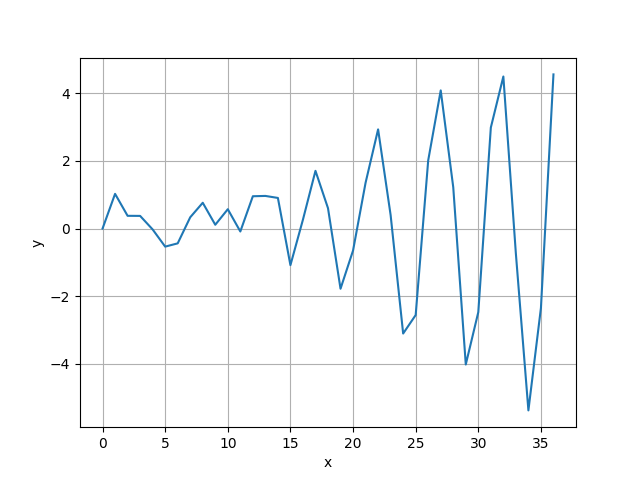

In [21]:
ir = y(x, 1 / 4.5)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(ir)
plot(np.array(deconvolved_signal))

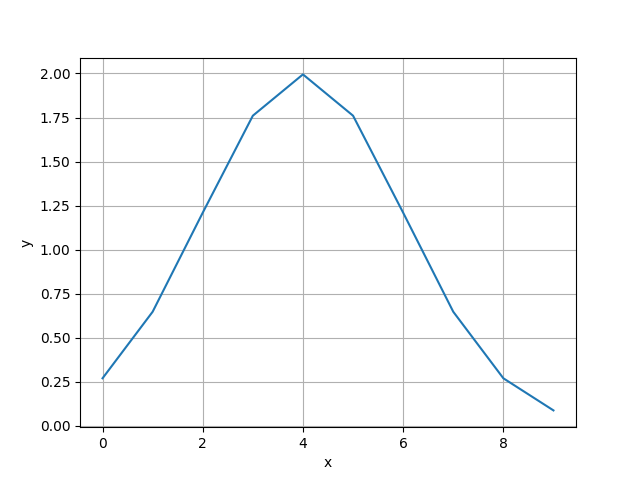

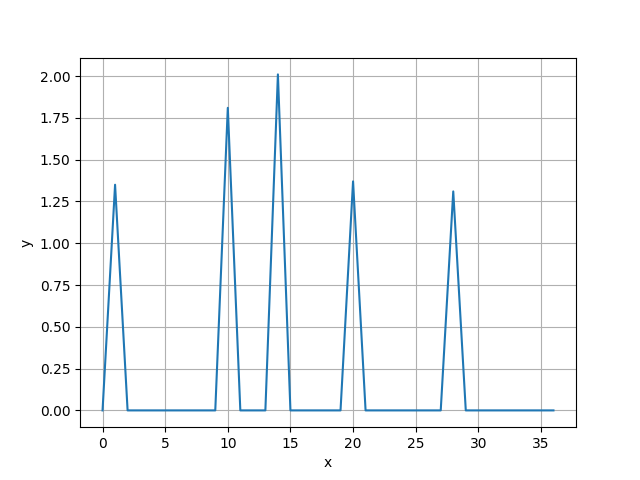

In [22]:
ir = y(x, 1 / 5)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(ir)
plot(np.array(deconvolved_signal))

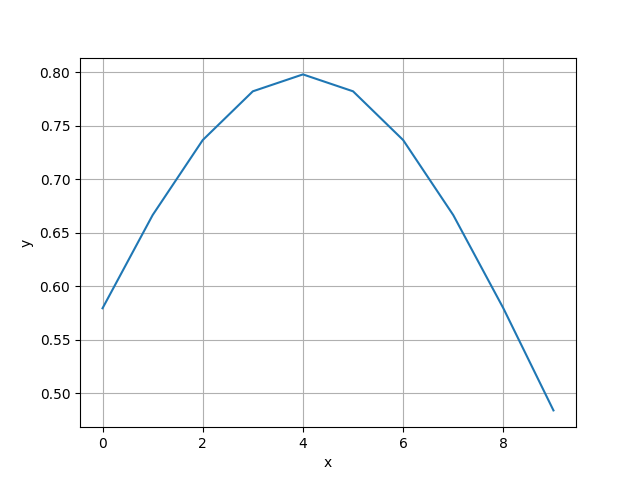

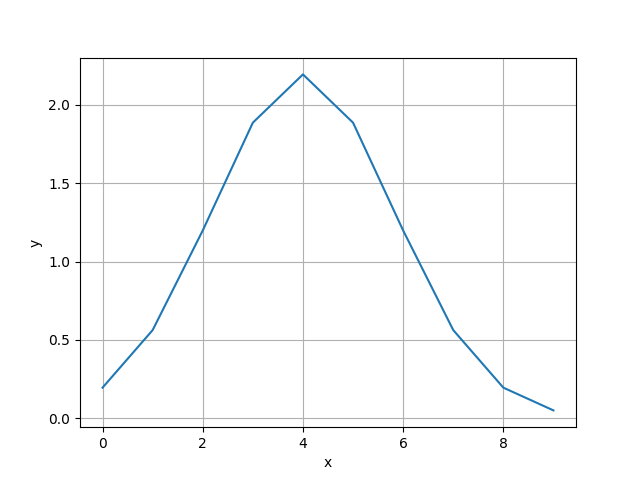

In [23]:
plot(y(x, 1 / 2))
plot(y(x, 1 / 5.5))

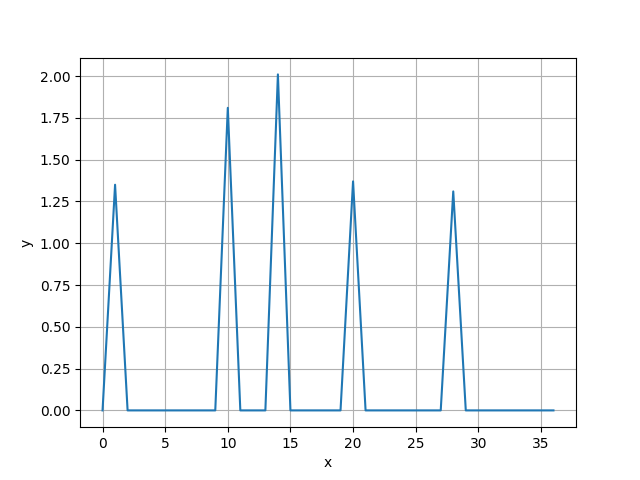

In [34]:
ir = y(x, 1 / 5)
deconvolved_signal, _ = signal.deconvolve(convolved_signal, ir)
plot(np.array(deconvolved_signal))